# Python Exercise 5: Travel Pony Ad Cost Regression Analysis
Hathaway Zhang <br>
104369396  <br>
Sep.26, 2018  <br>

In [4]:
#  import necessary packages
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
#  remove rows that have 0 amount spent
dfRaw = pd.read_csv("Travel Pony Facebook.csv")
dfCleaned = dfRaw[dfRaw['Amount Spent (USD)'] != 0]

## 1. Graph a histogram of Amount Spent using Seaborn

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


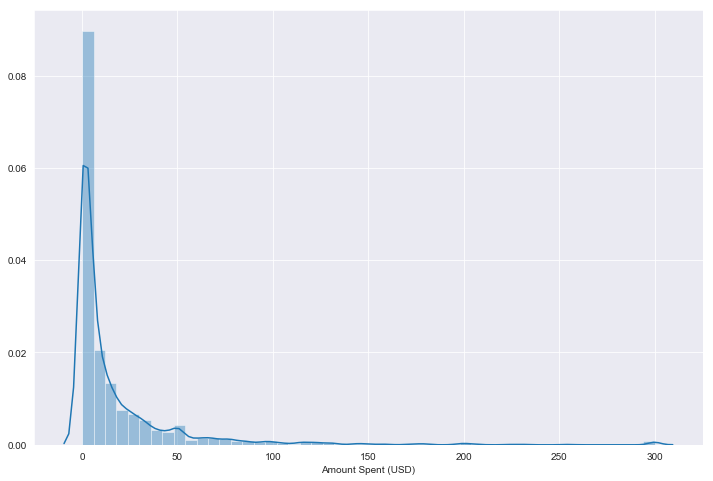

In [44]:
#  graph a histogram of Amount Spent using Seaborn
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.set_style('darkgrid')
ax = sns.distplot(dfCleaned['Amount Spent (USD)'])

## 2. Build a multiple regression 
The outcome variable is Amount Spent and the predictor variables are: Campaign Name, Reach, Frequency, Impressions, Clicks, Unique Clicks, Page Likes, Page Engagement, Post Engagement, Post Likes, Post Comments, Post Shares, Photo Views, Website Clicks.

In [10]:
#  hide the warning message
pd.options.mode.chained_assignment = None  # default='warn'
#  filter the items under campaign name and grouped them into 6 parts
dfCleaned.loc[dfCleaned['Campaign Name'].str.contains('Nanigans', case=False), 'Campaign Name'] = 'Nanigans'
dfCleaned.loc[dfCleaned['Campaign Name'].str.contains('TravelPony', case=False), 'Campaign Name'] = 'TravelPony'
dfCleaned.loc[dfCleaned['Campaign Name'].str.contains('Simple'), 'Campaign Name'] = 'Simple_Multi_Fill_Campaign'
dfCleaned.loc[dfCleaned['Campaign Name'].str.contains('Ad'), 'Campaign Name'] = 'Ad'
dfCleaned.loc[dfCleaned['Campaign Name'].str.contains('Post'), 'Campaign Name'] = 'Post'
#  show all the possible items in campaign name after filtering
dfCleaned['Campaign Name'].unique()

array(['Cyber Weekend', 'TravelPony', 'Post', 'Nanigans',
       'Simple_Multi_Fill_Campaign', 'Ad'], dtype=object)

In [11]:
#  forming final dataframe for regression
dfCN = pd.get_dummies(dfCleaned['Campaign Name'])
dfD = pd.concat([dfCleaned, dfCN], axis=1)
#  selecting independent variables and dependent variable for regression
dependV = dfD['Amount Spent (USD)']
independV = dfD[['Ad','Cyber Weekend','Nanigans','Post','Simple_Multi_Fill_Campaign','TravelPony','Reach','Frequency',
                 'Impressions','Clicks','Unique Clicks','Page Likes','Page Engagement','Post Engagement','Post Likes',
                 'Post Comments','Post Shares','Photo Views','Website Clicks']]

In [12]:
#  build a multiple regression 
model = sm.OLS(dependV, independV).fit()
predictions = model.predict(independV) # make the predictions by the model
#  show the regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Amount Spent (USD)   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1360.
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        22:45:19   Log-Likelihood:                -6573.0
No. Observations:                1802   AIC:                         1.318e+04
Df Residuals:                    1784   BIC:                         1.328e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Ad                             0.1666      3.803      0.044      0.965      -7.292       7.625
Cyber Weekend               -193.3195     26.951     -7.173      0.000    -246.179    -140.460
Nanigans                      -2.3150      2.014     -1.149      0.251      -6.266       1.636
Post                         -12.0410      7.576     -1.589      0.112     -26.899       2.817
Simple_Multi_Fill_Campaign    -0.0647      1.882     -0.034      0.973      -3.756       3.627
TravelPony                     7.2926      4.253      1.715      0.087      -1.048      15.633
Reach                          0.0033      0.000     20.921      0.000       0.003       0.004
Frequency                     -0.7778      1.836     -0.424      0.672      -4.378       2.823
Impressions                   -0.0009   8.41e-05    -10.146      0.000      -0.001      -0.001
Clicks                        -0.3859      0.113     -3.413      0.001      -0.608      -0.164
Unique Clicks                  0.5155      0.127      4.057      0.000       0.266       0.765
Page Likes                    24.4507      9.359      2.613      0.009       6.096      42.806
Page Engagement              -21.1451      9.355     -2.260      0.024     -39.494      -2.796
Post Engagement               18.0241      7.797      2.312      0.021       2.732      33.316
Post Likes                     2.6100      1.564      1.669      0.095      -0.458       5.678
Post Comments                  3.5949      1.627      2.209      0.027       0.403       6.787
Post Shares                    4.9334      1.588      3.107      0.002       1.819       8.048
Photo Views                    3.3214      1.562      2.126      0.034       0.257       6.385
Website Clicks                 3.5644      1.563      2.281      0.023       0.500       6.629
==============================================================================
Omnibus:                      796.064   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21680.838
Skew:                           1.484   Prob(JB):                         0.00
Kurtosis:                      19.732   Cond. No.                     7.07e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.86e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 3. What are the three predictors with the highest predictive value (rank them, please).

In [42]:
#  rank the three predictors with the highest predictive value
p = 0.05
result = pd.concat([model.pvalues, model.params], axis=1)
result = result.rename(index=str, columns={0: "P Value", 1: "Coeff."})
#  remove p value larger than 0.05, which is not significant to discuss in our case
#  sort value based on the coeff.
result = result[result['P Value'] < p].sort_values('Coeff.', ascending = False)
result['Rank'] = result['Coeff.'].rank(ascending=0).astype(int)
result

,P Value,Coeff.,Rank
Page Likes,9.059883e-03,24.450740,1
Post Engagement,2.090729e-02,18.024142,2
Post Shares,1.920459e-03,4.933423,3
Post Comments,2.731019e-02,3.594876,4
Website Clicks,2.265358e-02,3.564398,5
Photo Views,3.363899e-02,3.321407,6
Unique Clicks,5.180673e-05,0.515465,7
Reach,4.302627e-87,0.003310,8
Impressions,1.482248e-23,-0.000853,9
Clicks,6.578548e-04,-0.385926,10


### Answer: 
__Page Likes__, __Post Engagement__, and __Post Shares__ are the three predictors with the highest predictive value.